### LoRA COVERAGE MAP (RSSI & SNR)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
from palettable.colorbrewer.sequential import YlGnBu_5_r

import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

### I. Data loading

In [2]:
column_names = ['nrow', 'loramac_rcx', 'gps_time', 'lat', 'lon',
                'alt', 'nb_sent', 'loramac_trx', 'crc_trx', 'crc_rcx',
                'crc_status', 'lora_ts', 'rssi', 'snr', 'sf', 'crc_row'] 


df = pd.read_csv('data/data.csv', header=None, names = column_names, parse_dates=True, index_col=2)

In [3]:
df.head()

,nrow,loramac_rcx,lat,lon,alt,nb_sent,loramac_trx,crc_trx,crc_rcx,crc_status,lora_ts,rssi,snr,sf,crc_row
gps_time,,,,,,,,,,,,,,,
2017-05-30 12:36:00,0,70b3d5499d9565b3,43.42266,-1.609919,42.49,339,70b3d5499c3a7f7d,0x7c,0x7c,True,3230236963,-118,-8,7,0x90
2017-05-30 12:36:01,1,70b3d5499d9565b3,43.42266,-1.609920,42.49,340,70b3d5499c3a7f7d,0x18,0x18,True,3232305968,-116,-12,7,0x11
2017-05-30 12:36:04,2,70b3d5499d9565b3,43.42266,-1.609923,42.49,341,70b3d5499c3a7f7d,0x7a,0x7a,True,3234374986,-113,3,7,0x98
2017-05-30 12:36:06,3,70b3d5499d9565b3,43.42266,-1.609916,42.49,342,70b3d5499c3a7f7d,0xdc,0xdc,True,3236444007,-118,-17,7,0xdb
2017-05-30 12:36:08,4,70b3d5499d9565b3,43.42266,-1.609915,42.49,343,70b3d5499c3a7f7d,0xbe,0xbe,True,3238513015,-117,-10,7,0x58


### II. EDA

In [4]:
# nrows, ncols
df.shape

(332, 15)

In [5]:
# column types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 332 entries, 2017-05-30 12:36:00 to 2017-05-30 12:35:51
Data columns (total 15 columns):
nrow           332 non-null int64
loramac_rcx    332 non-null object
lat            332 non-null float64
lon            332 non-null float64
alt            332 non-null float64
nb_sent        332 non-null object
loramac_trx    332 non-null object
crc_trx        331 non-null object
crc_rcx        332 non-null object
crc_status     332 non-null object
lora_ts        332 non-null int64
rssi           332 non-null int64
snr            332 non-null int64
sf             332 non-null object
crc_row        329 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 41.5+ KB


In [6]:
# Basic descriptive statistics
df.describe()

,nrow,lat,lon,alt,lora_ts,rssi,snr
count,332.000000,332.000000,332.000000,332.000000,3.320000e+02,332.000000,332.000000
mean,92.533133,43.423321,-1.607221,34.511084,3.420643e+09,-99.780120,10.015060
std,61.842081,0.001230,0.001723,8.601070,4.763108e+08,19.907562,18.059061
min,0.000000,43.420140,-1.611490,15.490000,-1.250000e+02,-128.000000,-46.000000
25%,41.750000,43.422655,-1.608779,29.490000,3.108447e+09,-112.000000,0.750000
50%,83.000000,43.423095,-1.606756,33.490000,3.483698e+09,-107.000000,17.000000
75%,139.250000,43.424243,-1.606028,38.490000,3.685949e+09,-95.750000,24.000000
max,222.000000,43.425760,-1.604278,64.490000,4.086838e+09,-23.000000,29.000000


#### II.1 A bit of data cleaning

In [7]:
# Get rid of rows with crc_status 'False'
df = df.loc[df['crc_status']=='True']

#### II.2 RSSI EDA

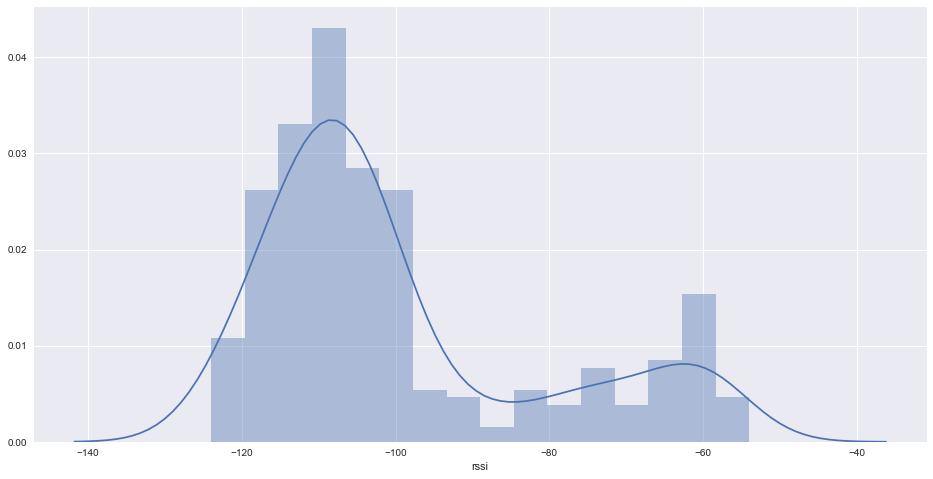

In [8]:
# RSSI distribution
plt.rcParams['figure.figsize'] = (16, 8)
sns.distplot(df['rssi'], kde=True)

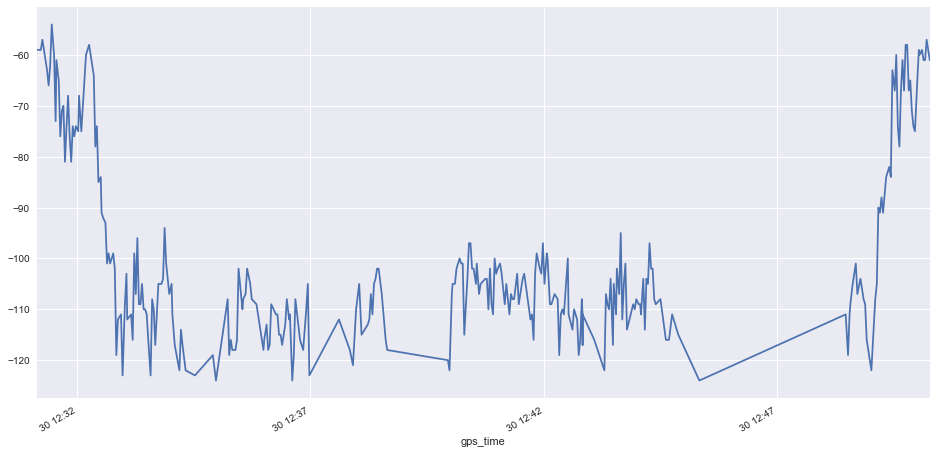

In [9]:
df['rssi'].plot()

#### II.2 SNR EDA

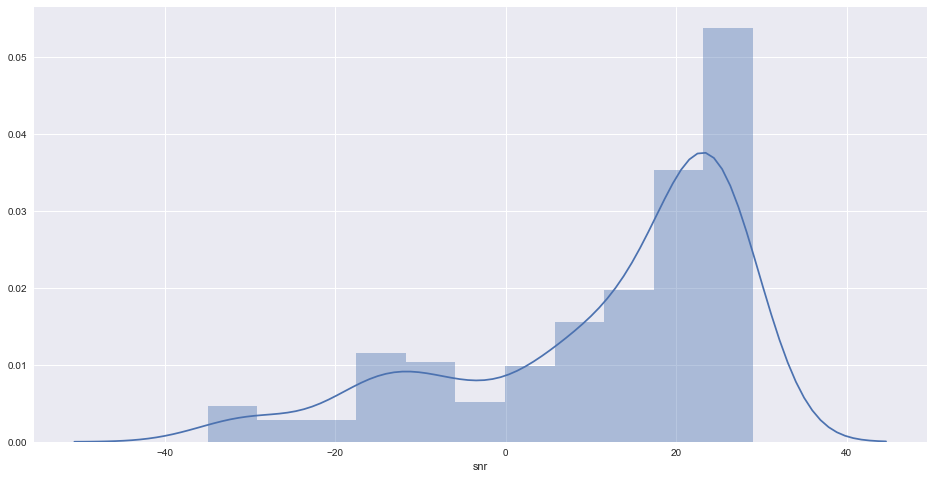

In [10]:
sns.distplot(df['snr'], kde=True)

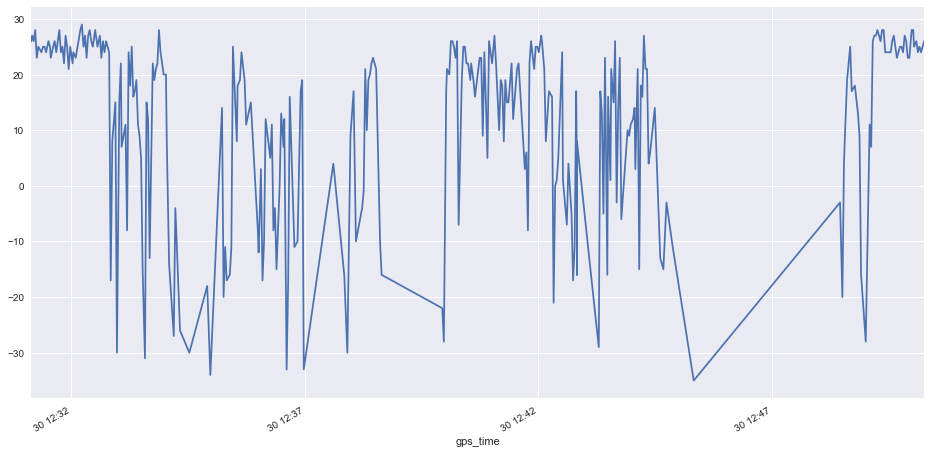

In [11]:
df['snr'].plot()

### III. MAPPING

In [12]:
# Convert to geo-dataframe
df['geometry'] = df.apply(lambda z: Point(z.lat, z.lon), axis=1)
df = gpd.GeoDataFrame(df)

In [13]:
# Get bounding box
df.crs = {'init' :'epsg:4326'}
bounds = df.total_bounds
bounds

(43.420830000000002,
 -1.6114899999999999,
 43.425730000000001,
 -1.6042780000000001)

#### III.1 RSSI

//anaconda/envs/ictp1/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3459: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/envs/ictp1/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3472: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
//anaconda/envs/ictp1/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/envs/ictp1/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


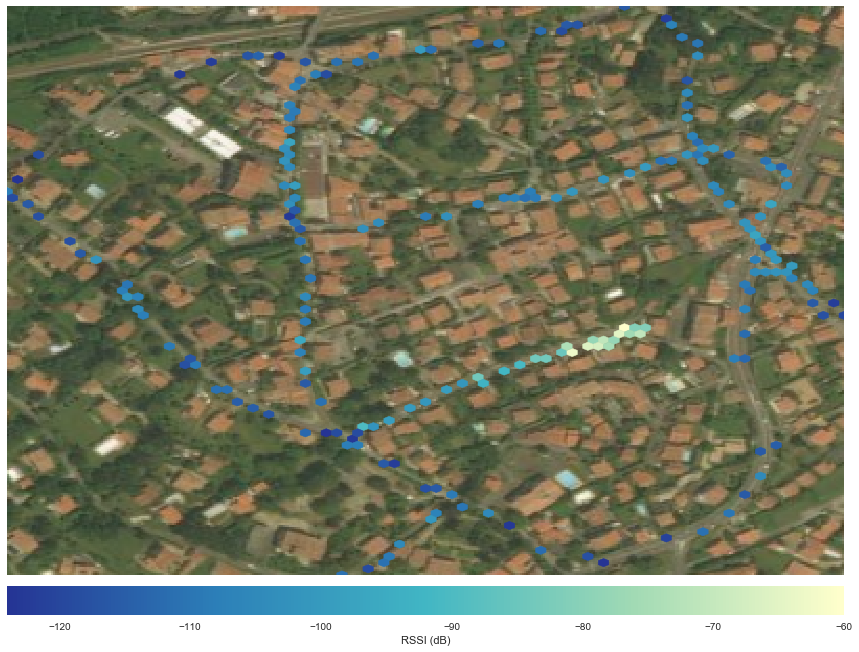

In [14]:
plt.rcParams["figure.figsize"] = [15, 15]
map = Basemap(llcrnrlon=bounds[1],llcrnrlat=bounds[0],
              urcrnrlon=bounds[3],urcrnrlat=bounds[2], 
              epsg=4326)

map.hexbin(df.lon.values, df.lat.values, C = df.rssi.values, 
           reduce_C_function = min, gridsize=80, 
           mincnt=0, cmap=YlGnBu_5_r.get_mpl_colormap(), 
           linewidths=0.5, edgecolors='none')

map.colorbar(location='bottom', label='RSSI (dB)')

#map.arcgisimage(service='ESRI_Imagery_World_2D', dpi=300, verbose= True)
#map.arcgisimage(service='ESRI_StreetMap_World_2D', dpi=500, verbose= True)
#map.arcgisimage(service='ESRI_StreetMap_World_2D', dpi=600, verbose= True)

map.arcgisimage(service='World_Imagery', dpi=600, verbose= False)